# Text to Directed Graph

2021-09-25

Given a piece of text (e.g., song lyrics), treat each word as a node in a network graph, and count each transition between consecutive words as a directed edge, with weight proportional to the frequency of that transition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import re

from collections import Counter
import networkx as nx
%matplotlib inline

In [2]:
with open('../input/Daft Punk - Harder Better Faster Stronger.txt', 'r') as f:
    lines = f.read()

# Remove newlines, parentheses, and selected punctuation
lines = re.sub('[\(\)\,\'"\?-]', ' ', lines).lower()
lines

'work it\nmake it\ndo it\nmakes us\nharder\nbetter\nfaster\nstronger\nmore than\nhour\nhour\nnever\never\nafter\nwork is\nover\nwork it\nmake it\ndo it\nmakes us\nharder\nbetter\nfaster\nstronger\nwork it harder  make it better\ndo it faster  makes us stronger\nmore than ever  hour after hour\nwork is never over\nwork it harder  make it better\ndo it faster  makes us stronger\nmore than ever  hour after hour\nwork is never over\nwork it harder  make it better\ndo it faster  makes us stronger\nmore than ever  hour after hour\nwork is never over\nwork it harder  make it better\ndo it faster  makes us stronger\nmore than ever  hour after hour\nwork is never over\nwork it harder  make it better\ndo it faster  makes us stronger\nmore than ever  hour after hour\nwork is never over\nwork it harder  make it better\ndo it faster  makes us\nmore than ever hour after hour\nwork is never over\nwork it harder  make it better\ndo it faster  makes us stronger\nmore than ever  hour after hour\nwork is

In [3]:
lines = lines.split()  # Defaults to treating consecutive whitespace (incl. line breaks) as single separator

In [4]:
edges = Counter(zip(lines[:-1], lines[1:]))
edges = pd.Series(edges).reset_index()
edges.columns = ['source', 'target', 'weight']
edges = edges.sort_values(['weight', 'source', 'target'], ascending=[0, 1, 1]).reset_index(drop=True)

In [5]:
edges.head(10)

,source,target,weight
0,do,it,16
1,work,it,16
2,make,it,15
3,makes,us,15
4,more,than,15
5,work,is,15
6,ever,hour,14
7,hour,work,14
8,is,never,14
9,it,faster,14


In [6]:
G = nx.from_pandas_edgelist(edges, edge_attr='weight', create_using=nx.DiGraph)

In [7]:
G.number_of_nodes(), G.number_of_edges()

(19, 42)

In [8]:
', '.join(list(G.nodes))

'do, it, work, make, makes, us, more, than, is, ever, hour, never, faster, over, after, better, harder, stronger, strong'

In [9]:
G.out_edges('harder')

OutEdgeDataView([('harder', 'make'), ('harder', 'better'), ('harder', 'do')])

In [10]:
G.in_edges('harder')

InEdgeDataView([('it', 'harder'), ('us', 'harder')])

In [11]:
# Manually relate each node's degree to its size
node_size = []

for node, degree in enumerate(G.degree(weight='weight')):
    node_size.append(2000 + 40*degree[1])

In [12]:
# Manually relate each edge's weight to its line weight
linewidths = [1 + G[u][v]['weight']**0.8 for u, v in G.edges()]

In [13]:
# def nudge(pos, x_shift, y_shift):
#     return {n:(x + x_shift, y + y_shift) 
#             for n,(x,y) in pos.items()}

In [14]:
# Manually transform and normalize 
node_color = np.array(node_size)
node_color -= node_color.min()
node_color = np.sqrt(node_color)
node_color = node_color / node_color.max()

In [15]:
pos = nx.nx_pydot.pydot_layout(G, prog='fdp') # ‘dot’, 'neato', ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’

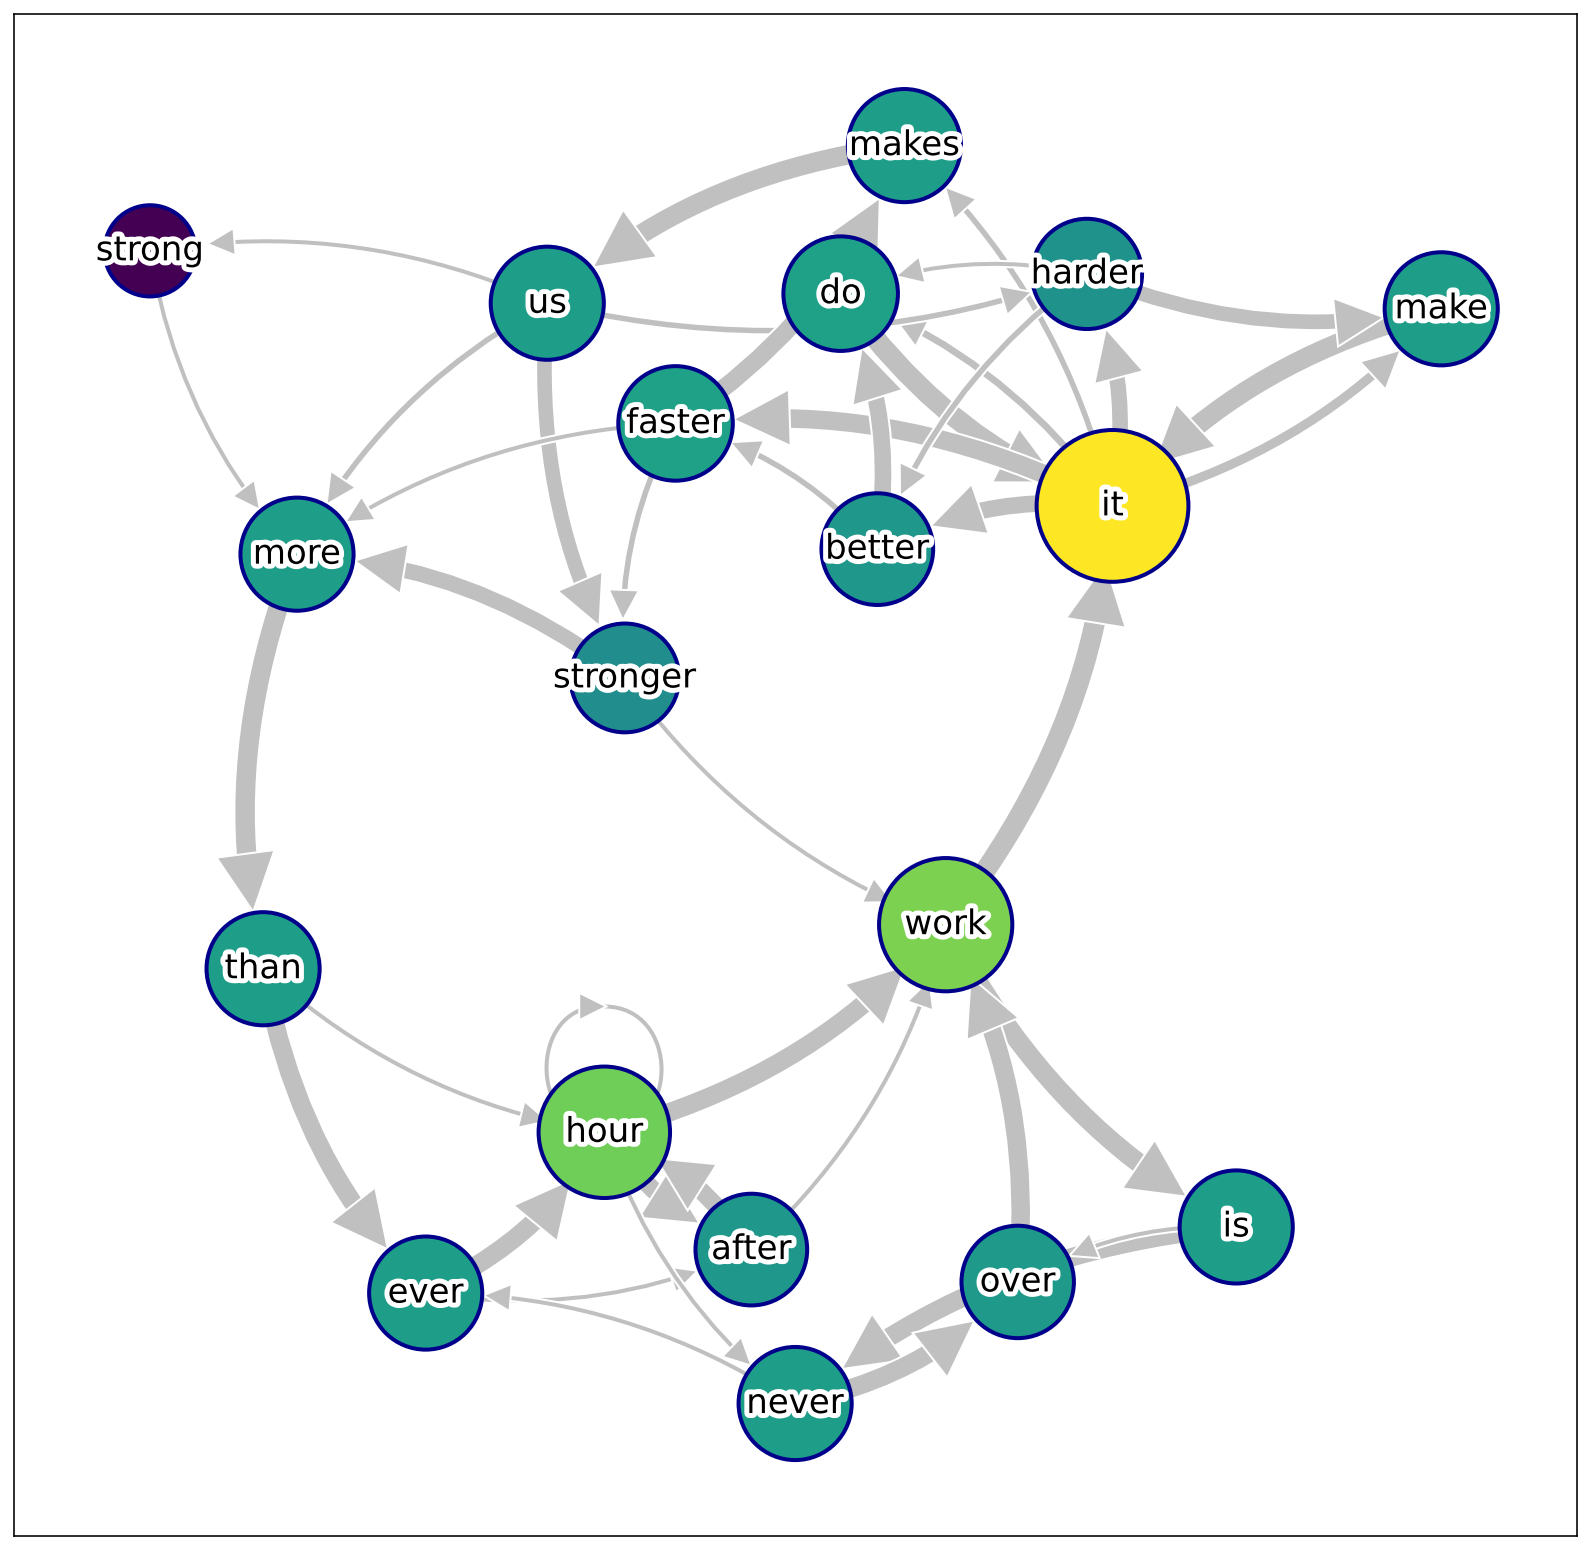

In [16]:
fig, ax = plt.subplots(figsize=(14, 14))
font_size = 17

nodes = nx.draw_networkx_nodes(
    G,
    pos,
    cmap='viridis',
    node_color=node_color,
    vmin=0,
    vmax=1,
    edgecolors='darkblue',
    linewidths=2,
    node_size=node_size,
    ax=ax
)

# Draw edges and store the returned FancyArrowPatch list
arrowheads = nx.draw_networkx_edges(
    G,
    pos,
    arrows=True,
    edge_color='#c0c0c0',
    arrowstyle='-|>',
    connectionstyle='arc3,rad=0.15',
    width=linewidths,
    min_source_margin=0,
    min_target_margin=30,
    ax=ax
)

# https://stackoverflow.com/q/67251763/
for h, w in zip(arrowheads, linewidths):
    # mutation_scale affects only the arrowhead size, not the arrow tail.
    # The constants here are arbitrary; you may want/need to change them
    h.set_mutation_scale(20 + w)
    
    # Sharpen arrowheads by creating a mitered joint between arrowhead 
    # line segments, instead of the default joinstyle='round'
    h.set_joinstyle('miter')
    
    # Prevent each arrow tail from jutting forward and through the arrowhead,
    # which happens with the default capstyle='projecting'
    h.set_capstyle('butt')
    
    # Add white outline to edges
    h.set_path_effects([path_effects.Stroke(linewidth=2+w, 
                                            foreground='white'),
                       path_effects.Normal()])
    
node_label_handles = nx.draw_networkx_labels(
    G, 
    font_size=font_size,
    pos=pos
);

# Add white outline to text
for t in node_label_handles.values():
    t.set_path_effects([path_effects.Stroke(linewidth=5, 
                                            foreground='white'),
                       path_effects.Normal()])

In [17]:
fig.savefig('../output/Daft Punk - Harder Better Faster Stronger.png', bbox_inches='tight', dpi=100)